In [4]:
import time
import matplotlib.pyplot as plt
import seaborn as sns


import scanpy as sc
import anndata



import importlib

import pandas as pd
import numpy as np

In [5]:
fn='/grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/10XMultiome/Mouse/Mouse_atac.h5ad'



In [25]:
fn='/grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/snm3C/Mouse/Mouse_mCG_gene_fractions.h5ad'

In [6]:
adata_orig = sc.read_h5ad(fn)

In [7]:
adata_orig

AnnData object with n_obs × n_vars = 39470 × 546993
    obs: 'Sample', 'TSSEnrichment', 'ReadsInTSS', 'ReadsInPromoter', 'ReadsInBlacklist', 'PromoterRatio', 'PassQC', 'NucleosomeRatio', 'nMultiFrags', 'nMonoFrags', 'nFrags', 'nDiFrags', 'BlacklistRatio', 'ReadsInPeaks', 'FRIP', 'class_Bakken_2022', 'subclass_Bakken_2022', 'cluster_Bakken_2022'
    var: 'peak'

In [241]:
adata_orig.var[:]

peak
chr1:3094805-3095305          chr1:3094805-3095305
chr1:3095470-3095970          chr1:3095470-3095970
chr1:3112174-3112674          chr1:3112174-3112674
chr1:3113534-3114034          chr1:3113534-3114034
chr1:3119746-3120246          chr1:3119746-3120246
...                                            ...
chrX:169879313-169879813  chrX:169879313-169879813
chrX:169880181-169880681  chrX:169880181-169880681
chrX:169925477-169925977  chrX:169925477-169925977
chrX:169948550-169949050  chrX:169948550-169949050
chrX:169950978-169951478  chrX:169950978-169951478

[546993 rows x 1 columns]

In [130]:
df_all_index = adata_orig.obs[:].reset_index()

In [138]:
df_all_index = df_all_index.reset_index()

In [135]:
subclass_index = df_all_index[df_all_index['subclass_Bakken_2022']==given_subclass].level_0.tolist()
subclass_mean = adata_orig.X[subclass_index, :].mean(axis=0)
subclass_mean.to_csv('/grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/10XMultiome/Mouse/subclass_{given_subclass}_mean.csv')



index   Sample  TSSEnrichment  ReadsInTSS  \
0      MOp2c1_AAACAGCCAATATAGG-1  2C_rep1         21.008      2334.0   
1      MOp2c1_AAACAGCCAGGATTAA-1  2C_rep1         15.714       492.0   
2      MOp2c1_AAACAGCCATAGCAGG-1  2C_rep1         19.763      3014.0   
3      MOp2c1_AAACATGCACCTGTAA-1  2C_rep1         10.786      5436.0   
4      MOp2c1_AAACCAACAATATACC-1  2C_rep1          9.679      1872.0   
...                          ...      ...            ...         ...   
39465  MOp5d2_TTTGTGTTCCCGAAGC-1  5D_rep2          7.174      4641.0   
39466  MOp5d2_TTTGTGTTCCTAGTCC-1  5D_rep2         11.507      6392.0   
39467  MOp5d2_TTTGTTGGTACTGATG-1  5D_rep2         14.926      4696.0   
39468  MOp5d2_TTTGTTGGTTGCCTCA-1  5D_rep2          7.393      2677.0   
39469  MOp5d2_TTTGTTGGTTTACTTG-1  5D_rep2         12.329      5803.0   

       ReadsInPromoter  ReadsInBlacklist  PromoterRatio  PassQC  \
0               8408.0             597.0       0.272580     1.0   
1               1966.0             201.0       0.240401     1.0   
2              10532.0             736.0       0.234764     1.0   
3              20954.0            2551.0       0.124178     1.0   
4               7782.0             888.0       0.143606     1.0   
...                ...               ...            ...     ...   
39465          19614.0            2579.0       0.105028     1.0   
39466          24622.0            2587.0       0.151217     1.0   
39467          17688.0            1378.0       0.196050     1.0   
39468          11654.0            1798.0       0.099295     1.0   
39469          21986.0            2389.0       0.145449     1.0   

       NucleosomeRatio  nMultiFrags  nMonoFrags   nFrags  nDiFrags  \
0             1.355735       3536.0      6547.0  15423.0    5340.0   
1             1.127471        891.0      1922.0   4089.0    1276.0   
2             1.453352       5515.0      9143.0  22431.0    7773.0   
3             2.035037      23466.0     27799.0  84371.0   33106.0   
4             1.454480       6487.0     11039.0  27095.0    9569.0   
...                ...          ...         ...      ...       ...   
39465         1.414663      22996.0     38670.0  93375.0   31709.0   
39466         2.225044      24084.0     25244.0  81413.0   32085.0   
39467         1.447960      11249.0     18428.0  45111.0   15434.0   
39468         1.405575      14713.0     24395.0  58684.0   19576.0   
39469         2.299140      23015.0     22909.0  75580.0   29656.0   

       BlacklistRatio  ReadsInPeaks      FRIP class_Bakken_2022  \
0            0.019354       17653.0  0.572406      Non-Neuronal   
1            0.024578        4430.0  0.541962      Non-Neuronal   
2            0.016406       25409.0  0.566659      Non-Neuronal   
3            0.015118       81334.0  0.482042     Glutamatergic   
4            0.016387       26663.0  0.492192     Glutamatergic   
...               ...           ...       ...               ...   
39465        0.013810       77077.0  0.412839     Glutamatergic   
39466        0.015888       68335.0  0.419789         GABAergic   
39467        0.015273       44554.0  0.493892      Non-Neuronal   
39468        0.015319       43049.0  0.366905     Glutamatergic   
39469        0.015804       71936.0  0.476013     Glutamatergic   

      subclass_Bakken_2022 cluster_Bakken_2022  
0                     VLMC                VLMC  
1                Micro-PVM       Microglia/PVM  
2                    Astro             Astro_2  
3                  L2/3 IT             L2/3 IT  
4                    L5 IT             L5 IT_1  
...                    ...                 ...  
39465                L5 IT             L5 IT_1  
39466                Pvalb             Pvalb_1  
39467                  OPC                 OPC  
39468              L2/3 IT             L2/3 IT  
39469                L6 IT             L6 IT_2  

[39470 rows x 19 columns]

In [243]:
adata_orig.obs[:]['Sample'].drop_duplicates().reset_index()['Sample'].tolist()



['2C_rep1',
 '2C_rep2',
 '3C_rep1',
 '3C_rep2',
 '4B_rep1',
 '4B_rep2',
 '5D_rep1',
 '5D_rep2']

In [240]:
adata_orig.X[subclass_index, :].max(axis=0).toarray().max()

4.0

In [ ]:
How to binarise 

In [ ]:
np.where(a>threshold, upper, lower)

In [267]:
adata_orig.X[subclass_index, :].toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [279]:
df_list = []

subclass_list = adata_orig.obs[:]['subclass_Bakken_2022'].drop_duplicates().reset_index()['subclass_Bakken_2022'].tolist()
replicates = adata_orig.obs[:]['Sample'].drop_duplicates().reset_index()['Sample'].tolist()
for given_subclass in subclass_list:

    for rep in replicates:
        subclass_index = df_all_index[((df_all_index['subclass_Bakken_2022']==given_subclass) & (df_all_index['Sample']==rep))].level_0.tolist()
        if len(subclass_index) > 10:
            s= adata_orig.X[subclass_index, :]
            s[s != 0] = 1
            subclass_mean = s.mean(axis=0)
            #subclass_mean = adata_orig.X[subclass_index, :].mean(axis=0)
            df_peak_mean = adata_orig.var[:]
            df_peak_mean['mean'] = subclass_mean.tolist()[0]
            df_peak_mean['subclass'] = given_subclass
            df_peak_mean['rep'] = rep
            print(df_peak_mean.head())
            df_list.append(df_peak_mean)
    
df_peak_mean = pd.concat(df_list)
df_peak_mean.to_csv(f'/grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/10XMultiome/Mouse/subclass_mean.csv')



<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.132231     VLMC  2C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.041322     VLMC  2C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.016529     VLMC  2C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.041322     VLMC  2C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.190083     VLMC  2C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.046512     VLMC  2C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.031008     VLMC  2C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000     VLMC  2C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.015504     VLMC  2C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.046512     VLMC  2C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.000000     VLMC  3C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.000000     VLMC  3C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.000000     VLMC  3C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.000000     VLMC  3C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.133333     VLMC  3C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.034483     VLMC  3C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.000000     VLMC  3C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000     VLMC  3C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.000000     VLMC  3C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.017241     VLMC  3C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.000000     VLMC  4B_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.000000     VLMC  4B_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.000000     VLMC  4B_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.083333     VLMC  4B_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.083333     VLMC  4B_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.041667     VLMC  4B_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.000000     VLMC  4B_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000     VLMC  4B_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.000000     VLMC  4B_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.041667     VLMC  4B_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.040323     VLMC  5D_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.008065     VLMC  5D_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.000000     VLMC  5D_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.016129     VLMC  5D_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.040323     VLMC  5D_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.230769     VLMC  5D_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.076923     VLMC  5D_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000     VLMC  5D_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.000000     VLMC  5D_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.000000     VLMC  5D_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean   subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.126404  Micro-PVM  2C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.044944  Micro-PVM  2C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.008427  Micro-PVM  2C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.028090  Micro-PVM  2C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.199438  Micro-PVM  2C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean   subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.045010  Micro-PVM  2C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.025440  Micro-PVM  2C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000  Micro-PVM  2C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.003914  Micro-PVM  2C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.070450  Micro-PVM  2C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean   subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.028947  Micro-PVM  3C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.002632  Micro-PVM  3C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000  Micro-PVM  3C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.005263  Micro-PVM  3C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.042105  Micro-PVM  3C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean   subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.038521  Micro-PVM  4B_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.015408  Micro-PVM  4B_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.001541  Micro-PVM  4B_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.004622  Micro-PVM  4B_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.066256  Micro-PVM  4B_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean   subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.046742  Micro-PVM  5D_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.019830  Micro-PVM  5D_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.008499  Micro-PVM  5D_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.007082  Micro-PVM  5D_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.080737  Micro-PVM  5D_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean   subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.059701  Micro-PVM  5D_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.007463  Micro-PVM  5D_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.003731  Micro-PVM  5D_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.014925  Micro-PVM  5D_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.063433  Micro-PVM  5D_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.123418    Astro  2C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.041139    Astro  2C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.009494    Astro  2C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.034810    Astro  2C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.202532    Astro  2C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.056893    Astro  2C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.013129    Astro  2C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.002188    Astro  2C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.015317    Astro  2C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.039387    Astro  2C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.079585    Astro  3C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.024221    Astro  3C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.010381    Astro  3C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.017301    Astro  3C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.131488    Astro  3C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.051282    Astro  3C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.017949    Astro  3C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000    Astro  3C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.007692    Astro  3C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.048718    Astro  3C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.126667    Astro  4B_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.026667    Astro  4B_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.020000    Astro  4B_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.020000    Astro  4B_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.173333    Astro  4B_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.056150    Astro  4B_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.008021    Astro  4B_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000    Astro  4B_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.016043    Astro  4B_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.082888    Astro  4B_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.051630    Astro  5D_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.009511    Astro  5D_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.004076    Astro  5D_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.021739    Astro  5D_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.065217    Astro  5D_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.066667    Astro  5D_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.025641    Astro  5D_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.015385    Astro  5D_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.005128    Astro  5D_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.107692    Astro  5D_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.144667  L2/3 IT  2C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.040127  L2/3 IT  2C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.011616  L2/3 IT  2C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.025343  L2/3 IT  2C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.181626  L2/3 IT  2C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.042369  L2/3 IT  2C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.010934  L2/3 IT  2C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.005467  L2/3 IT  2C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.011390  L2/3 IT  2C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.075626  L2/3 IT  2C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.101365  L2/3 IT  3C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.021442  L2/3 IT  3C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.007797  L2/3 IT  3C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.015595  L2/3 IT  3C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.116959  L2/3 IT  3C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.031421  L2/3 IT  3C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.012295  L2/3 IT  3C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.005464  L2/3 IT  3C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.006831  L2/3 IT  3C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.053279  L2/3 IT  3C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.139640  L2/3 IT  4B_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.040541  L2/3 IT  4B_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.018018  L2/3 IT  4B_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.018018  L2/3 IT  4B_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.175676  L2/3 IT  4B_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.060571  L2/3 IT  4B_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.014857  L2/3 IT  4B_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.003429  L2/3 IT  4B_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.006857  L2/3 IT  4B_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.075429  L2/3 IT  4B_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.044580  L2/3 IT  5D_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.015734  L2/3 IT  5D_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.001748  L2/3 IT  5D_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.011364  L2/3 IT  5D_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.054196  L2/3 IT  5D_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.055703  L2/3 IT  5D_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.015915  L2/3 IT  5D_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.005305  L2/3 IT  5D_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.015915  L2/3 IT  5D_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.068966  L2/3 IT  5D_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.117229    L5 IT  2C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.049734    L5 IT  2C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.008881    L5 IT  2C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.021314    L5 IT  2C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.213144    L5 IT  2C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.045038    L5 IT  2C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.014178    L5 IT  2C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.004170    L5 IT  2C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.010842    L5 IT  2C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.062552    L5 IT  2C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.100121    L5 IT  3C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.031363    L5 IT  3C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.002413    L5 IT  3C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.020507    L5 IT  3C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.129071    L5 IT  3C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.043729    L5 IT  3C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.011551    L5 IT  3C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.002475    L5 IT  3C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.006601    L5 IT  3C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.044554    L5 IT  3C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.126190    L5 IT  4B_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.042857    L5 IT  4B_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.021429    L5 IT  4B_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.014286    L5 IT  4B_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.152381    L5 IT  4B_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.046176    L5 IT  4B_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.018759    L5 IT  4B_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.006494    L5 IT  4B_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.007937    L5 IT  4B_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.060606    L5 IT  4B_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.043356    L5 IT  5D_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.012846    L5 IT  5D_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.002810    L5 IT  5D_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.012846    L5 IT  5D_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.053794    L5 IT  5D_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.064516    L5 IT  5D_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.016129    L5 IT  5D_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.006048    L5 IT  5D_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.008065    L5 IT  5D_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.056452    L5 IT  5D_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.107438    Oligo  2C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.074380    Oligo  2C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.008264    Oligo  2C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.024793    Oligo  2C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.227273    Oligo  2C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.027933    Oligo  2C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.005587    Oligo  2C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000    Oligo  2C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.013966    Oligo  2C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.078212    Oligo  2C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.072727    Oligo  3C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.018182    Oligo  3C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.000000    Oligo  3C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.000000    Oligo  3C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.109091    Oligo  3C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.043787    Oligo  3C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.009467    Oligo  3C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.003550    Oligo  3C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.008284    Oligo  3C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.049704    Oligo  3C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.055556    Oligo  4B_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.027778    Oligo  4B_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.013889    Oligo  4B_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.000000    Oligo  4B_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.222222    Oligo  4B_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.051079    Oligo  4B_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.010791    Oligo  4B_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.005036    Oligo  4B_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.010072    Oligo  4B_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.061870    Oligo  4B_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.051494    Oligo  5D_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.015893    Oligo  5D_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.008900    Oligo  5D_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.008264    Oligo  5D_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.056580    Oligo  5D_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.055556    Oligo  5D_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.020635    Oligo  5D_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.007937    Oligo  5D_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.014286    Oligo  5D_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.066667    Oligo  5D_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.136364      Sst  2C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.090909      Sst  2C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.000000      Sst  2C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.045455      Sst  2C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.227273      Sst  2C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.051724      Sst  2C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.008621      Sst  2C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000      Sst  2C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.000000      Sst  2C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.025862      Sst  2C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.097561      Sst  3C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.032520      Sst  3C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.024390      Sst  3C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.000000      Sst  3C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.162602      Sst  3C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.037915      Sst  3C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.009479      Sst  3C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.009479      Sst  3C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.014218      Sst  3C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.056872      Sst  3C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.144928      Sst  4B_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.043478      Sst  4B_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.014493      Sst  4B_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.043478      Sst  4B_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.246377      Sst  4B_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.067797      Sst  4B_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.021186      Sst  4B_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000      Sst  4B_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.008475      Sst  4B_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.067797      Sst  4B_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.038961      Sst  5D_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.008658      Sst  5D_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.000000      Sst  5D_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.004329      Sst  5D_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.051948      Sst  5D_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.058824      Sst  5D_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.023529      Sst  5D_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.011765      Sst  5D_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.000000      Sst  5D_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.047059      Sst  5D_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.126126    Pvalb  2C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.063063    Pvalb  2C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.009009    Pvalb  2C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.045045    Pvalb  2C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.216216    Pvalb  2C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.033457    Pvalb  2C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.007435    Pvalb  2C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.003717    Pvalb  2C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.022305    Pvalb  2C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.070632    Pvalb  2C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.105960    Pvalb  3C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.033113    Pvalb  3C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.013245    Pvalb  3C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.046358    Pvalb  3C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.125828    Pvalb  3C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.017316    Pvalb  3C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.008658    Pvalb  3C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000    Pvalb  3C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.004329    Pvalb  3C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.025974    Pvalb  3C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.133333    Pvalb  4B_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.026667    Pvalb  4B_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.026667    Pvalb  4B_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.026667    Pvalb  4B_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.200000    Pvalb  4B_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.051661    Pvalb  4B_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.014760    Pvalb  4B_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.003690    Pvalb  4B_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.000000    Pvalb  4B_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.055351    Pvalb  4B_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.037791    Pvalb  5D_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.002907    Pvalb  5D_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.005814    Pvalb  5D_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.011628    Pvalb  5D_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.072674    Pvalb  5D_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.092105    Pvalb  5D_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.013158    Pvalb  5D_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.006579    Pvalb  5D_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.026316    Pvalb  5D_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.098684    Pvalb  5D_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.144578      Vip  2C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.024096      Vip  2C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.000000      Vip  2C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.048193      Vip  2C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.289157      Vip  2C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.027322      Vip  2C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.010929      Vip  2C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000      Vip  2C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.016393      Vip  2C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.043716      Vip  2C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.093333      Vip  3C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.040000      Vip  3C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.000000      Vip  3C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.013333      Vip  3C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.120000      Vip  3C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.019802      Vip  3C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.009901      Vip  3C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000      Vip  3C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.000000      Vip  3C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.059406      Vip  3C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.088235      Vip  4B_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.058824      Vip  4B_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.029412      Vip  4B_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.029412      Vip  4B_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.176471      Vip  4B_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.088889      Vip  4B_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.007407      Vip  4B_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.007407      Vip  4B_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.000000      Vip  4B_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.059259      Vip  4B_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.046784      Vip  5D_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.005848      Vip  5D_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.000000      Vip  5D_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.011696      Vip  5D_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.046784      Vip  5D_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.031746      Vip  5D_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.015873      Vip  5D_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000      Vip  5D_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.000000      Vip  5D_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.063492      Vip  5D_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.127660     Endo  2C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.042553     Endo  2C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.021277     Endo  2C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.000000     Endo  2C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.148936     Endo  2C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.054545     Endo  2C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.000000     Endo  2C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000     Endo  2C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.000000     Endo  2C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.054545     Endo  2C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.023256     Endo  3C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.000000     Endo  3C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.023256     Endo  3C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.046512     Endo  3C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.046512     Endo  3C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.029851     Endo  4B_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.000000     Endo  4B_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000     Endo  4B_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.014925     Endo  4B_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.089552     Endo  4B_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.044444     Endo  5D_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.022222     Endo  5D_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.000000     Endo  5D_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.022222     Endo  5D_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.122222     Endo  5D_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.051282     Endo  5D_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.025641     Endo  5D_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000     Endo  5D_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.000000     Endo  5D_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.076923     Endo  5D_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.128713    Lamp5  2C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.059406    Lamp5  2C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.009901    Lamp5  2C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.029703    Lamp5  2C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.217822    Lamp5  2C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.025210    Lamp5  2C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.021008    Lamp5  2C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.008403    Lamp5  2C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.012605    Lamp5  2C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.063025    Lamp5  2C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.085714    Lamp5  3C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.014286    Lamp5  3C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.000000    Lamp5  3C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.028571    Lamp5  3C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.185714    Lamp5  3C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.038095    Lamp5  3C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.000000    Lamp5  3C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000    Lamp5  3C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.019048    Lamp5  3C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.076190    Lamp5  3C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak  mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.08    Lamp5  4B_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.00    Lamp5  4B_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.00    Lamp5  4B_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.04    Lamp5  4B_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.20    Lamp5  4B_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.035714    Lamp5  4B_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.000000    Lamp5  4B_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.005952    Lamp5  4B_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.005952    Lamp5  4B_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.083333    Lamp5  4B_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.057143    Lamp5  5D_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.005714    Lamp5  5D_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.017143    Lamp5  5D_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.000000    Lamp5  5D_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.051429    Lamp5  5D_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.061728    Lamp5  5D_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.012346    Lamp5  5D_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000    Lamp5  5D_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.000000    Lamp5  5D_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.123457    Lamp5  5D_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.074074     Sncg  2C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.000000     Sncg  2C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.037037     Sncg  2C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.037037     Sncg  2C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.037037     Sncg  2C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak  mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305   0.0     Sncg  3C_rep2
chr1:3095470-3095970  chr1:3095470-3095970   0.0     Sncg  3C_rep2
chr1:3112174-3112674  chr1:3112174-3112674   0.0     Sncg  3C_rep2
chr1:3113534-3114034  chr1:3113534-3114034   0.0     Sncg  3C_rep2
chr1:3119746-3120246  chr1:3119746-3120246   0.0     Sncg  3C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.045455     Sncg  4B_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.000000     Sncg  4B_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000     Sncg  4B_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.045455     Sncg  4B_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.136364     Sncg  4B_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.000000     Sncg  5D_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.000000     Sncg  5D_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.000000     Sncg  5D_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.000000     Sncg  5D_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.133333     Sncg  5D_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.000000  L5/6 NP  2C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.000000  L5/6 NP  2C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.000000  L5/6 NP  2C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.000000  L5/6 NP  2C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.272727  L5/6 NP  2C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.052632  L5/6 NP  2C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.026316  L5/6 NP  2C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000  L5/6 NP  2C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.026316  L5/6 NP  2C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.026316  L5/6 NP  2C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.105263  L5/6 NP  3C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.026316  L5/6 NP  3C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.013158  L5/6 NP  3C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.039474  L5/6 NP  3C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.078947  L5/6 NP  3C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.052174  L5/6 NP  3C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.026087  L5/6 NP  3C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000  L5/6 NP  3C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.008696  L5/6 NP  3C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.086957  L5/6 NP  3C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.133333  L5/6 NP  4B_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.022222  L5/6 NP  4B_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.022222  L5/6 NP  4B_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.022222  L5/6 NP  4B_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.222222  L5/6 NP  4B_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.044025  L5/6 NP  4B_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.012579  L5/6 NP  4B_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000  L5/6 NP  4B_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.006289  L5/6 NP  4B_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.056604  L5/6 NP  4B_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.057692  L5/6 NP  5D_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.014423  L5/6 NP  5D_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.009615  L5/6 NP  5D_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.019231  L5/6 NP  5D_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.057692  L5/6 NP  5D_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.064103  L5/6 NP  5D_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.000000  L5/6 NP  5D_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000  L5/6 NP  5D_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.000000  L5/6 NP  5D_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.051282  L5/6 NP  5D_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.117647    L5 ET  2C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.000000    L5 ET  2C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000    L5 ET  2C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.000000    L5 ET  2C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.058824    L5 ET  2C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.047059    L5 ET  3C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.035294    L5 ET  3C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.000000    L5 ET  3C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.000000    L5 ET  3C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.105882    L5 ET  3C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.028571    L5 ET  3C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.000000    L5 ET  3C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000    L5 ET  3C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.057143    L5 ET  3C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.057143    L5 ET  3C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.068966    L5 ET  4B_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.103448    L5 ET  4B_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.000000    L5 ET  4B_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.000000    L5 ET  4B_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.172414    L5 ET  4B_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak  mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.10    L5 ET  4B_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.00    L5 ET  4B_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.00    L5 ET  4B_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.00    L5 ET  4B_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.05    L5 ET  4B_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.074627    L5 ET  5D_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.022388    L5 ET  5D_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.000000    L5 ET  5D_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.007463    L5 ET  5D_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.067164    L5 ET  5D_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.086957    L5 ET  5D_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.043478    L5 ET  5D_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000    L5 ET  5D_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.000000    L5 ET  5D_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.173913    L5 ET  5D_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.079518    L6 CT  3C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.024096    L6 CT  3C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.007229    L6 CT  3C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.021687    L6 CT  3C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.127711    L6 CT  3C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.046368    L6 CT  3C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.010819    L6 CT  3C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.003091    L6 CT  3C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.012365    L6 CT  3C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.043277    L6 CT  3C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.180328    L6 CT  4B_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.053279    L6 CT  4B_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.016393    L6 CT  4B_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.032787    L6 CT  4B_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.151639    L6 CT  4B_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.041951    L6 CT  4B_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.018537    L6 CT  4B_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.006829    L6 CT  4B_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.005854    L6 CT  4B_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.069268    L6 CT  4B_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.051460    L6 CT  5D_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.016690    L6 CT  5D_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.001391    L6 CT  5D_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.007650    L6 CT  5D_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.056328    L6 CT  5D_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.050633    L6 CT  5D_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.014768    L6 CT  5D_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.012658    L6 CT  5D_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.010549    L6 CT  5D_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.088608    L6 CT  5D_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.046512      OPC  2C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.000000      OPC  2C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000      OPC  2C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.000000      OPC  2C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.069767      OPC  2C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.161290      OPC  3C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.032258      OPC  3C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.000000      OPC  3C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.000000      OPC  3C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.129032      OPC  3C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.000000      OPC  3C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.000000      OPC  3C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000      OPC  3C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.000000      OPC  3C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.029412      OPC  3C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.088235      OPC  4B_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.000000      OPC  4B_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000      OPC  4B_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.000000      OPC  4B_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.058824      OPC  4B_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.051282      OPC  5D_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.000000      OPC  5D_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.000000      OPC  5D_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.025641      OPC  5D_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.025641      OPC  5D_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak    mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.1875      OPC  5D_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.0000      OPC  5D_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.0000      OPC  5D_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.0000      OPC  5D_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.1250      OPC  5D_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.139535      L6b  3C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.023256      L6b  3C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.023256      L6b  3C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.000000      L6b  3C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.139535      L6b  3C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.067797      L6b  3C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.000000      L6b  3C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000      L6b  3C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.000000      L6b  3C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.050847      L6b  3C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.200000      L6b  4B_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.066667      L6b  4B_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.066667      L6b  4B_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.000000      L6b  4B_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.200000      L6b  4B_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.031746      L6b  4B_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.031746      L6b  4B_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000      L6b  4B_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.015873      L6b  4B_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.079365      L6b  4B_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.060976      L6b  5D_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.024390      L6b  5D_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.000000      L6b  5D_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.012195      L6b  5D_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.097561      L6b  5D_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak  mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.08      L6b  5D_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.00      L6b  5D_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.00      L6b  5D_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.00      L6b  5D_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.04      L6b  5D_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak  mean   subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305   0.0  Sst Chodl  4B_rep2
chr1:3095470-3095970  chr1:3095470-3095970   0.0  Sst Chodl  4B_rep2
chr1:3112174-3112674  chr1:3112174-3112674   0.0  Sst Chodl  4B_rep2
chr1:3113534-3114034  chr1:3113534-3114034   0.0  Sst Chodl  4B_rep2
chr1:3119746-3120246  chr1:3119746-3120246   0.0  Sst Chodl  4B_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean   subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.166667  Sst Chodl  5D_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.083333  Sst Chodl  5D_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.000000  Sst Chodl  5D_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.000000  Sst Chodl  5D_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.083333  Sst Chodl  5D_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.081081    L6 IT  3C_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.040541    L6 IT  3C_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.006757    L6 IT  3C_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.040541    L6 IT  3C_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.135135    L6 IT  3C_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.050562    L6 IT  3C_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.016854    L6 IT  3C_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000    L6 IT  3C_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.011236    L6 IT  3C_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.050562    L6 IT  3C_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.145161    L6 IT  4B_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.080645    L6 IT  4B_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.016129    L6 IT  4B_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.016129    L6 IT  4B_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.145161    L6 IT  4B_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.020513    L6 IT  4B_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.025641    L6 IT  4B_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.005128    L6 IT  4B_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.015385    L6 IT  4B_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.051282    L6 IT  4B_rep2


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.050179    L6 IT  5D_rep1
chr1:3095470-3095970  chr1:3095470-3095970  0.010753    L6 IT  5D_rep1
chr1:3112174-3112674  chr1:3112174-3112674  0.003584    L6 IT  5D_rep1
chr1:3113534-3114034  chr1:3113534-3114034  0.017921    L6 IT  5D_rep1
chr1:3119746-3120246  chr1:3119746-3120246  0.071685    L6 IT  5D_rep1


<ipython-input-279-907bf154369d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['mean'] = subclass_mean.tolist()[0]
<ipython-input-279-907bf154369d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_mean['subclass'] = given_subclass
<ipython-input-279-907bf154369d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                      peak      mean subclass      rep
chr1:3094805-3095305  chr1:3094805-3095305  0.053097    L6 IT  5D_rep2
chr1:3095470-3095970  chr1:3095470-3095970  0.017699    L6 IT  5D_rep2
chr1:3112174-3112674  chr1:3112174-3112674  0.000000    L6 IT  5D_rep2
chr1:3113534-3114034  chr1:3113534-3114034  0.035398    L6 IT  5D_rep2
chr1:3119746-3120246  chr1:3119746-3120246  0.053097    L6 IT  5D_rep2


In [247]:
subclass_index

[]

In [246]:
adata_orig.X[subclass_index, :].max()

ValueError: zero-size array to reduction operation

In [169]:
subclass_mean.toarray().tolist()[0]

[3.0,
 3.0,
 1.0,
 3.0,
 3.0,
 4.0,
 4.0,
 2.0,
 1.0,
 3.0,
 2.0,
 4.0,
 2.0,
 3.0,
 1.0,
 2.0,
 4.0,
 2.0,
 4.0,
 2.0,
 4.0,
 3.0,
 1.0,
 4.0,
 2.0,
 2.0,
 3.0,
 3.0,
 2.0,
 2.0,
 4.0,
 3.0,
 3.0,
 3.0,
 4.0,
 4.0,
 3.0,
 4.0,
 4.0,
 3.0,
 2.0,
 3.0,
 2.0,
 4.0,
 2.0,
 2.0,
 2.0,
 4.0,
 4.0,
 2.0,
 4.0,
 4.0,
 3.0,
 2.0,
 2.0,
 3.0,
 2.0,
 2.0,
 2.0,
 3.0,
 4.0,
 3.0,
 3.0,
 2.0,
 2.0,
 1.0,
 4.0,
 1.0,
 3.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 4.0,
 3.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 1.0,
 2.0,
 4.0,
 2.0,
 4.0,
 2.0,
 4.0,
 2.0,
 3.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 4.0,
 2.0,
 3.0,
 4.0,
 2.0,
 3.0,
 2.0,
 2.0,
 2.0,
 2.0,
 4.0,
 2.0,
 2.0,
 4.0,
 2.0,
 2.0,
 2.0,
 4.0,
 1.0,
 4.0,
 3.0,
 3.0,
 4.0,
 2.0,
 2.0,
 3.0,
 4.0,
 2.0,
 2.0,
 4.0,
 2.0,
 4.0,
 0.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 4.0,
 4.0,
 2.0,
 2.0,
 4.0,
 4.0,
 2.0,
 2.0,
 3.0,
 2.0,
 3.0,
 3.0

In [162]:
df_list

[                                              peak      mean subclass
 chr1:3094805-3095305          chr1:3094805-3095305  0.092952    L6 IT
 chr1:3095470-3095970          chr1:3095470-3095970  0.038815    L6 IT
 chr1:3112174-3112674          chr1:3112174-3112674  0.007150    L6 IT
 chr1:3113534-3114034          chr1:3113534-3114034  0.033708    L6 IT
 chr1:3119746-3120246          chr1:3119746-3120246  0.124617    L6 IT
 ...                                            ...       ...      ...
 chrX:169879313-169879813  chrX:169879313-169879813  0.057201    L6 IT
 chrX:169880181-169880681  chrX:169880181-169880681  0.042901    L6 IT
 chrX:169925477-169925977  chrX:169925477-169925977  0.030644    L6 IT
 chrX:169948550-169949050  chrX:169948550-169949050  0.012257    L6 IT
 chrX:169950978-169951478  chrX:169950978-169951478  0.004086    L6 IT
 
 [546993 rows x 3 columns],
                                               peak      mean subclass
 chr1:3094805-3095305          chr1:3094805-309

In [161]:
subclass_list

['VLMC',
 'Micro-PVM',
 'Astro',
 'L2/3 IT',
 'L5 IT',
 'Oligo',
 'Sst',
 'Pvalb',
 'Vip',
 'Endo',
 'Lamp5',
 'Sncg',
 'L5/6 NP',
 'L5 ET',
 'L6 CT',
 'OPC',
 'L6b',
 'Sst Chodl',
 'L6 IT']

In [158]:
adata_orig.obs[:]['subclass_Bakken_2022'].drop_duplicates().reset_index()['subclass_Bakken_2022']

0          VLMC
1     Micro-PVM
2         Astro
3       L2/3 IT
4         L5 IT
5         Oligo
6           Sst
7         Pvalb
8           Vip
9          Endo
10        Lamp5
11         Sncg
12      L5/6 NP
13        L5 ET
14        L6 CT
15          OPC
16          L6b
17    Sst Chodl
18        L6 IT
Name: subclass_Bakken_2022, dtype: category
Categories (19, object): ['Astro', 'Endo', 'L2/3 IT', 'L5 ET', ..., 'Sst', 'Sst Chodl', 'VLMC', 'Vip']

In [156]:
df_peak_mean

peak      mean subclass
chr1:3094805-3095305          chr1:3094805-3095305  0.092952    L6 IT
chr1:3095470-3095970          chr1:3095470-3095970  0.038815    L6 IT
chr1:3112174-3112674          chr1:3112174-3112674  0.007150    L6 IT
chr1:3113534-3114034          chr1:3113534-3114034  0.033708    L6 IT
chr1:3119746-3120246          chr1:3119746-3120246  0.124617    L6 IT
...                                            ...       ...      ...
chrX:169879313-169879813  chrX:169879313-169879813  0.057201    L6 IT
chrX:169880181-169880681  chrX:169880181-169880681  0.042901    L6 IT
chrX:169925477-169925977  chrX:169925477-169925977  0.030644    L6 IT
chrX:169948550-169949050  chrX:169948550-169949050  0.012257    L6 IT
chrX:169950978-169951478  chrX:169950978-169951478  0.004086    L6 IT

[10392867 rows x 3 columns]

In [157]:
df_peak_mean[df_peak_mean['subclass'] == 'L6 IT']

peak      mean subclass
chr1:3094805-3095305          chr1:3094805-3095305  0.092952    L6 IT
chr1:3095470-3095970          chr1:3095470-3095970  0.038815    L6 IT
chr1:3112174-3112674          chr1:3112174-3112674  0.007150    L6 IT
chr1:3113534-3114034          chr1:3113534-3114034  0.033708    L6 IT
chr1:3119746-3120246          chr1:3119746-3120246  0.124617    L6 IT
...                                            ...       ...      ...
chrX:169879313-169879813  chrX:169879313-169879813  0.057201    L6 IT
chrX:169880181-169880681  chrX:169880181-169880681  0.042901    L6 IT
chrX:169925477-169925977  chrX:169925477-169925977  0.030644    L6 IT
chrX:169948550-169949050  chrX:169948550-169949050  0.012257    L6 IT
chrX:169950978-169951478  chrX:169950978-169951478  0.004086    L6 IT

[10392867 rows x 3 columns]

In [149]:
df_peak_mean = adata_orig.var[:]

In [151]:
subclass_mean.tolist()[0]

[0.11730769276618958,
 0.03461538627743721,
 0.003846153849735856,
 0.03461538627743721,
 0.1307692527770996,
 0.20769232511520386,
 0.16346155107021332,
 0.01923076994717121,
 0.011538461782038212,
 0.028846153989434242,
 0.04038461670279503,
 0.02500000037252903,
 0.028846153989434242,
 0.017307693138718605,
 0.001923076924867928,
 0.021153846755623817,
 0.02500000037252903,
 0.04038461670279503,
 0.021153846755623817,
 0.032692309468984604,
 0.017307693138718605,
 0.042307693511247635,
 0.009615384973585606,
 0.1596153974533081,
 0.009615384973585606,
 0.023076923564076424,
 0.07307692617177963,
 0.08269231021404266,
 0.036538463085889816,
 0.028846153989434242,
 0.15000000596046448,
 0.04615384712815285,
 0.09038461744785309,
 0.03461538627743721,
 0.03461538627743721,
 0.028846153989434242,
 0.04615384712815285,
 0.04038461670279503,
 0.026923077180981636,
 0.0634615421295166,
 0.026923077180981636,
 0.04423077031970024,
 0.05961538478732109,
 0.07692307978868484,
 0.0384615398943

In [146]:
given_subclass

'index'

In [144]:
df_all_index[df_all_index['subclass_Bakken_2022']==given_subclass].level_0

Series([], Name: level_0, dtype: int64)

In [145]:
df_all_index[df_all_index['subclass_Bakken_2022']==given_subclass]

Empty DataFrame
Columns: [level_0, index, Sample, TSSEnrichment, ReadsInTSS, ReadsInPromoter, ReadsInBlacklist, PromoterRatio, PassQC, NucleosomeRatio, nMultiFrags, nMonoFrags, nFrags, nDiFrags, BlacklistRatio, ReadsInPeaks, FRIP, class_Bakken_2022, subclass_Bakken_2022, cluster_Bakken_2022]
Index: []

In [142]:
subclass_index

[]

In [141]:
adata_orig.X[0, :]

<1x546993 sparse matrix of type '<class 'numpy.float32'>'
	with 48366 stored elements in Compressed Sparse Column format>

In [ ]:
adata_orig.obs[:]['subclass_Bakken_2022'].groupby(['class_Bakken_2022', 'subclass_Bakken_2022'])

In [117]:
atac_mean = adata_orig.X.mean(axis=0)

In [118]:
atac_max = adata_orig.X.max(axis=0)

In [119]:
df_peak_max = adata_orig.var[:]

In [148]:
adata_orig.var[:]

peak
chr1:3094805-3095305          chr1:3094805-3095305
chr1:3095470-3095970          chr1:3095470-3095970
chr1:3112174-3112674          chr1:3112174-3112674
chr1:3113534-3114034          chr1:3113534-3114034
chr1:3119746-3120246          chr1:3119746-3120246
...                                            ...
chrX:169879313-169879813  chrX:169879313-169879813
chrX:169880181-169880681  chrX:169880181-169880681
chrX:169925477-169925977  chrX:169925477-169925977
chrX:169948550-169949050  chrX:169948550-169949050
chrX:169950978-169951478  chrX:169950978-169951478

[546993 rows x 1 columns]

In [120]:
df_peak_max['max'] = atac_max.todense().tolist()[0]

<ipython-input-120-34a9443a8e94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_max['max'] = atac_max.todense().tolist()[0]


In [121]:
df_peak_max['mean'] = atac_mean.tolist()[0]

<ipython-input-121-9f30d432fef8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_max['mean'] = atac_mean.tolist()[0]


In [124]:
df_peak_max.to_csv('/grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/10XMultiome/Mouse/peak_mean.csv')


In [89]:
atac_max.to_numpy()

AttributeError: to_numpy not found

In [69]:
adata_orig.obs[:]['subclass_Bakken_2022'].drop_duplicates().to_csv('/grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/10XMultiome/Mouse/subclass_bakken.csv')



In [70]:
pd.read_csv('/grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/10XMultiome/Mouse/subclass_bakken.csv')



Unnamed: 0 subclass_Bakken_2022
0   MOp2c1_AAACAGCCAATATAGG-1                 VLMC
1   MOp2c1_AAACAGCCAGGATTAA-1            Micro-PVM
2   MOp2c1_AAACAGCCATAGCAGG-1                Astro
3   MOp2c1_AAACATGCACCTGTAA-1              L2/3 IT
4   MOp2c1_AAACCAACAATATACC-1                L5 IT
5   MOp2c1_AAAGCACCATTGTGAT-1                Oligo
6   MOp2c1_AACAAAGGTTTCCGGC-1                  Sst
7   MOp2c1_AACCCGCAGATAGACG-1                Pvalb
8   MOp2c1_AACTAGTGTTGCAATG-1                  Vip
9   MOp2c1_AACTAGTGTTGGTTGA-1                 Endo
10  MOp2c1_AAGGTCAAGTTAGTTG-1                Lamp5
11  MOp2c1_AGAGAGGAGACTATTG-1                 Sncg
12  MOp2c1_AGCCAGTGTGCATCGG-1              L5/6 NP
13  MOp2c1_AGGATCCGTAATCACG-1                L5 ET
14  MOp2c1_AGTTTGCAGGATTGAG-1                L6 CT
15  MOp2c1_ATGGTGCGTGACATGC-1                  OPC
16  MOp2c1_GGAACCACATGCAACC-1                  L6b
17  MOp2c1_TGTGCTGAGGCCTAAT-1            Sst Chodl
18  MOp2c2_CAGATTCAGGACGTAA-1                L6 IT

In [65]:
df_peaks = adata_orig.var[:]

In [128]:
df_peaks

peak
chr1:3094805-3095305          chr1:3094805-3095305
chr1:3095470-3095970          chr1:3095470-3095970
chr1:3112174-3112674          chr1:3112174-3112674
chr1:3113534-3114034          chr1:3113534-3114034
chr1:3119746-3120246          chr1:3119746-3120246
...                                            ...
chrX:169879313-169879813  chrX:169879313-169879813
chrX:169880181-169880681  chrX:169880181-169880681
chrX:169925477-169925977  chrX:169925477-169925977
chrX:169948550-169949050  chrX:169948550-169949050
chrX:169950978-169951478  chrX:169950978-169951478

[546993 rows x 1 columns]

In [24]:
df_peaks['chr'] = [x.split(':')[0] for x in df_peaks['peak']]

<ipython-input-24-8a42ed44a503>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peaks['chr'] = [x.split(':')[0] for x in df_peaks['peak']]


In [26]:
df_peaks['st'] = [x.split('-')[0].split(':')[1] for x in df_peaks['peak']]

<ipython-input-26-e787ee383deb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peaks['st'] = [x.split('-')[0].split(':')[1] for x in df_peaks['peak']]


In [28]:
df_peaks['end'] = [x.split('-')[1] for x in df_peaks['peak']]

<ipython-input-28-b04b6b2ae9a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peaks['end'] = [x.split('-')[1] for x in df_peaks['peak']]


In [30]:
df_peaks[['chr', 'st', 'end', 'peak']].to_csv('/grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/10XMultiome/Mouse/all_atac_peak.bed', index=False, sep='\t', header=False)



In [66]:
df_peaks


peak
chr1:3094805-3095305          chr1:3094805-3095305
chr1:3095470-3095970          chr1:3095470-3095970
chr1:3112174-3112674          chr1:3112174-3112674
chr1:3113534-3114034          chr1:3113534-3114034
chr1:3119746-3120246          chr1:3119746-3120246
...                                            ...
chrX:169879313-169879813  chrX:169879313-169879813
chrX:169880181-169880681  chrX:169880181-169880681
chrX:169925477-169925977  chrX:169925477-169925977
chrX:169948550-169949050  chrX:169948550-169949050
chrX:169950978-169951478  chrX:169950978-169951478

[546993 rows x 1 columns]

In [44]:
pd.read_csv('/grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/10XMultiome/Mouse/all_atac_peak.bed')

chr1\t3094805\t3095305\tchr1:3094805-3095305
0            chr1\t3095470\t3095970\tchr1:3095470-3095970
1            chr1\t3112174\t3112674\tchr1:3112174-3112674
2            chr1\t3113534\t3114034\tchr1:3113534-3114034
3            chr1\t3119746\t3120246\tchr1:3119746-3120246
4            chr1\t3120272\t3120772\tchr1:3120272-3120772
...                                                   ...
546987  chrX\t169879313\t169879813\tchrX:169879313-169...
546988  chrX\t169880181\t169880681\tchrX:169880181-169...
546989  chrX\t169925477\t169925977\tchrX:169925477-169...
546990  chrX\t169948550\t169949050\tchrX:169948550-169...
546991  chrX\t169950978\t169951478\tchrX:169950978-169...

[546992 rows x 1 columns]

In [33]:
base_folder='/grid/gillis/data_norepl/lohia'

In [80]:
process_type='inter'

species='mouse'
SRP_name='aggregates'
resolution='10kbp_raw'

In [81]:
    input_path=f'{base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/'
    bins_bed = pd.read_csv(f'{input_path}/all_bins.bed', names=['chr', 'start', 'end', 'bin_id'])
    bins_bed['bin_id'] = bins_bed.index
    #bins_bed['pos'] = bins_bed['chr'] + '_' + bins_bed['start'].astype('str')
    
    bins_bed.to_csv(f'{input_path}/all_bins_true.bed', index=False, header=False, sep='\t')

In [37]:
import os

In [82]:
os.system(f"~/.conda/envs/hicexplorer/bin/bedtools intersect -wo -b /grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/10XMultiome/Mouse/all_atac_peak.bed -a {base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/all_bins_true.bed > /grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/10XMultiome/Mouse/all_atac_peak_10kb.bed")
          
    

0

In [83]:
os.system(f"~/.conda/envs/hicexplorer/bin/bedtools intersect -wo -b /grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/10XMultiome/Mouse/mm10-blacklist.v2.bed -a {base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/all_bins_true.bed > /grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/10XMultiome/Mouse/all_bin_blacklist_10kb.bed")
          
    
    

0

In [74]:
pd.read_csv('/grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/10XMultiome/Mouse/all_bin_blacklist_10kb.bed', sep='\t', names=['d', 'd1', 'd2', 'bin_id', 'c', 'c1', 'c2', 'c3', 'c4'])



d        d1        d2   bin_id      c        c1        c2  \
0        chr1   8628000   8629000     8628   chr1   8628600   8719100   
1        chr1   8629000   8630000     8629   chr1   8628600   8719100   
2        chr1   8630000   8631000     8630   chr1   8628600   8719100   
3        chr1   8631000   8632000     8631   chr1   8628600   8719100   
4        chr1   8632000   8633000     8632   chr1   8628600   8719100   
...       ...       ...       ...      ...    ...       ...       ...   
139487  chr19  61427000  61428000  2462750  chr19  61330300  61431500   
139488  chr19  61428000  61429000  2462751  chr19  61330300  61431500   
139489  chr19  61429000  61430000  2462752  chr19  61330300  61431500   
139490  chr19  61430000  61431000  2462753  chr19  61330300  61431500   
139491  chr19  61431000  61431566  2462754  chr19  61330300  61431500   

                        c3    c4  
0       High Signal Region   400  
1       High Signal Region  1000  
2       High Signal Region  1000  
3       High Signal Region  1000  
4       High Signal Region  1000  
...                    ...   ...  
139487  High Signal Region  1000  
139488  High Signal Region  1000  
139489  High Signal Region  1000  
139490  High Signal Region  1000  
139491  High Signal Region   500  

[139492 rows x 9 columns]

In [71]:
pd.read_csv('/grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/10XMultiome/Mouse/all_atac_peak_10kb.bed', sep='\t')



chr1   3094000   3095000     3094 chr1.1   3094805   3095305  \
0        chr1   3095000   3096000     3095   chr1   3094805   3095305   
1        chr1   3095000   3096000     3095   chr1   3095470   3095970   
2        chr1   3112000   3113000     3112   chr1   3112174   3112674   
3        chr1   3113000   3114000     3113   chr1   3113534   3114034   
4        chr1   3114000   3115000     3114   chr1   3113534   3114034   
...       ...       ...       ...      ...    ...       ...       ...   
809190  chr19  61098000  61099000  2462421  chr19  61097653  61098153   
809191  chr19  61140000  61141000  2462463  chr19  61140637  61141137   
809192  chr19  61141000  61142000  2462464  chr19  61140637  61141137   
809193  chr19  61151000  61152000  2462474  chr19  61151568  61152068   
809194  chr19  61152000  61153000  2462475  chr19  61151568  61152068   

           chr1:3094805-3095305  195  
0          chr1:3094805-3095305  305  
1          chr1:3095470-3095970  500  
2          chr1:3112174-3112674  500  
3          chr1:3113534-3114034  466  
4          chr1:3113534-3114034   34  
...                         ...  ...  
809190  chr19:61097653-61098153  153  
809191  chr19:61140637-61141137  363  
809192  chr19:61140637-61141137  137  
809193  chr19:61151568-61152068  432  
809194  chr19:61151568-61152068   68  

[809195 rows x 9 columns]

In [59]:
df_all_peak = pd.read_csv('/grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/10XMultiome/Mouse/all_atac_peak_10kb.bed', sep='\t', names=['chr', 'bin_st', 'bin_end', 'bin_id', 'd', 'd2', 'd3', 'peak', 'overlap'])


In [62]:
df_all_peak

chr    bin_st   bin_end   bin_id      d        d2        d3  \
0        chr1   3094000   3095000     3094   chr1   3094805   3095305   
1        chr1   3095000   3096000     3095   chr1   3094805   3095305   
2        chr1   3095000   3096000     3095   chr1   3095470   3095970   
3        chr1   3112000   3113000     3112   chr1   3112174   3112674   
4        chr1   3113000   3114000     3113   chr1   3113534   3114034   
...       ...       ...       ...      ...    ...       ...       ...   
809191  chr19  61098000  61099000  2462421  chr19  61097653  61098153   
809192  chr19  61140000  61141000  2462463  chr19  61140637  61141137   
809193  chr19  61141000  61142000  2462464  chr19  61140637  61141137   
809194  chr19  61151000  61152000  2462474  chr19  61151568  61152068   
809195  chr19  61152000  61153000  2462475  chr19  61151568  61152068   

                           peak  overlap  
0          chr1:3094805-3095305      195  
1          chr1:3094805-3095305      305  
2          chr1:3095470-3095970      500  
3          chr1:3112174-3112674      500  
4          chr1:3113534-3114034      466  
...                         ...      ...  
809191  chr19:61097653-61098153      153  
809192  chr19:61140637-61141137      363  
809193  chr19:61140637-61141137      137  
809194  chr19:61151568-61152068      432  
809195  chr19:61151568-61152068       68  

[809196 rows x 9 columns]

In [60]:
df_all_peak.groupby(['bin_id'])['d'].count().median()

1.0

In [54]:
from umap import UMAP
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline


In [53]:
df_all_peak.groupby(['bin_id'])['d'].count().median()

3.0

<Axes: xlabel='d', ylabel='Count'>

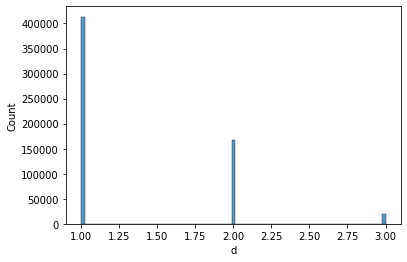

In [61]:
sns.histplot(df_all_peak.groupby(['bin_id'])['d'].count())

In [16]:
[x for x in df_peaks['peak'].head(10).astype('str').split('-')]

AttributeError: 'Series' object has no attribute 'split'

In [31]:
adata_orig.obs[:]['subclass_Bakken_2022'].drop_duplicates()

cell
CEMBA3C_MOp2C_R1_P1-1-F3-D1         L2/3 IT
CEMBA3C_MOp2C_R1_P1-1-F3-C13          Astro
CEMBA3C_MOp2C_R1_P1-1-F3-D2             Sst
CEMBA3C_MOp2C_R1_P1-1-F3-A13          L5 IT
CEMBA3C_MOp2C_R1_P1-1-F3-E1           Lamp5
CEMBA3C_MOp2C_R1_P1-1-F3-D14            OPC
CEMBA3C_MOp2C_R1_P1-1-F3-D13      Micro-PVM
CEMBA3C_MOp2C_R1_P1-1-F3-E2           Pvalb
CEMBA3C_MOp2C_R1_P1-1-F3-F14          Oligo
CEMBA3C_MOp2C_R1_P1-1-F3-K2             Vip
CEMBA3C_MOp2C_R1_P1-2-F8-C15        L5/6 NP
CEMBA3C_MOp2C_R1_P1-2-F8-J3            VLMC
CEMBA3C_MOp2C_R1_P1-3-J16-G17          Sncg
CEMBA3C_MOp2C_R1_P1-3-J16-C5          L6 CT
CEMBA3C_MOp2C_R1_P1-4-M16-G7          L5 ET
CEMBA3C_MOp2C_R1_P2-5-E15-P22          Endo
CEMBA3C_MOp2C_R2_P1-4-H7-H7           L6 IT
CEMBA3C_MOp5D_R1_P1-3-B13-E5     L6 IT Car3
CEMBA3C_MOp5D_R1_P1-3-B13-E6            L6b
CEMBA3C_MOp3C_R1_P2-2-C17-G15     Sst Chodl
Name: subclass_Bakken_2022, dtype: category
Categories (20, object): ['Astro', 'Endo', 'L2/3 IT', 'L5 ET', ..., 'Ss

In [7]:
adata_orig.obs[:10]

nCount_RNA  nFeature_RNA  nCount_ATAC  \
MOp2c1_AAACAGCCAATATAGG-1      5348.0          1911       8982.0   
MOp2c1_AAACAGCCAGGATTAA-1      5307.0          1916       2155.0   
MOp2c1_AAACAGCCATAGCAGG-1      6132.0          1793      13410.0   
MOp2c1_AAACATGCACCTGTAA-1      7742.0          2809      47629.0   
MOp2c1_AAACCAACAATATACC-1      8224.0          3073      15434.0   
MOp2c1_AAACCAACAGCTAACC-1      6378.0          1807      10460.0   
MOp2c1_AAACCAACAGCTAATT-1      8234.0          3157      45529.0   
MOp2c1_AAACCGCGTTGCTTCG-1      5234.0          1959       9808.0   
MOp2c1_AAACGCGCAACAGGAT-1      7060.0          2125       4998.0   
MOp2c1_AAACGGATCCCATAAA-1      8182.0          3372      47136.0   

                           nFeature_ATAC  nCount_SCT  nFeature_SCT  \
MOp2c1_AAACAGCCAATATAGG-1           7350      5348.0          1911   
MOp2c1_AAACAGCCAGGATTAA-1           2015      5307.0          1916   
MOp2c1_AAACAGCCATAGCAGG-1          10620      6132.0          1793   
MOp2c1_AAACATGCACCTGTAA-1          36297      7742.0          2809   
MOp2c1_AAACCAACAATATACC-1          13545      8224.0          3073   
MOp2c1_AAACCAACAGCTAACC-1           8879      6378.0          1807   
MOp2c1_AAACCAACAGCTAATT-1          35548      8234.0          3157   
MOp2c1_AAACCGCGTTGCTTCG-1           7951      5234.0          1959   
MOp2c1_AAACGCGCAACAGGAT-1           4736      7060.0          2125   
MOp2c1_AAACGGATCCCATAAA-1          36462      8182.0          3372   

                          class_Bakken_2022 subclass_Bakken_2022  \
MOp2c1_AAACAGCCAATATAGG-1      Non-Neuronal                 VLMC   
MOp2c1_AAACAGCCAGGATTAA-1      Non-Neuronal            Micro-PVM   
MOp2c1_AAACAGCCATAGCAGG-1      Non-Neuronal                Astro   
MOp2c1_AAACATGCACCTGTAA-1     Glutamatergic              L2/3 IT   
MOp2c1_AAACCAACAATATACC-1     Glutamatergic                L5 IT   
MOp2c1_AAACCAACAGCTAACC-1      Non-Neuronal                Astro   
MOp2c1_AAACCAACAGCTAATT-1     Glutamatergic              L2/3 IT   
MOp2c1_AAACCGCGTTGCTTCG-1      Non-Neuronal            Micro-PVM   
MOp2c1_AAACGCGCAACAGGAT-1     Glutamatergic                L5 IT   
MOp2c1_AAACGGATCCCATAAA-1     Glutamatergic                L5 IT   

                          cluster_Bakken_2022 species  sample  
MOp2c1_AAACAGCCAATATAGG-1                VLMC   mouse  MOp2c1  
MOp2c1_AAACAGCCAGGATTAA-1       Microglia/PVM   mouse  MOp2c1  
MOp2c1_AAACAGCCATAGCAGG-1             Astro_2   mouse  MOp2c1  
MOp2c1_AAACATGCACCTGTAA-1             L2/3 IT   mouse  MOp2c1  
MOp2c1_AAACCAACAATATACC-1             L5 IT_1   mouse  MOp2c1  
MOp2c1_AAACCAACAGCTAACC-1             Astro_2   mouse  MOp2c1  
MOp2c1_AAACCAACAGCTAATT-1             L2/3 IT   mouse  MOp2c1  
MOp2c1_AAACCGCGTTGCTTCG-1       Microglia/PVM   mouse  MOp2c1  
MOp2c1_AAACGCGCAACAGGAT-1             L5 IT_1   mouse  MOp2c1  
MOp2c1_AAACGGATCCCATAAA-1             L5 IT_1   mouse  MOp2c1

In [14]:
adata_orig.obsm['umap'].shape

(39470, 2)

In [234]:
df_atac_subclass_macs2 = pd.read_csv(f'/grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/10XMultiome/Mouse/Supplementary_Table_7.tsv', sep='\t')

df_atac_subclass_macs2['chr'] = [x.split('-')[0] for x in df_atac_subclass_macs2['coord']]
df_atac_subclass_macs2['st'] = [x.split('-')[1] for x in df_atac_subclass_macs2['coord']]
df_atac_subclass_macs2['end'] = [x.split('-')[2] for x in df_atac_subclass_macs2['coord']]
df_atac_subclass_macs2 = df_atac_subclass_macs2[~df_atac_subclass_macs2['chr'].isin(['chrX', 'chrY'])]
df_atac_subclass_macs2['chr_num'] = [int(x.split('chr')[1]) for x in df_atac_subclass_macs2['chr']]
df_atac_subclass_macs2['ste'] = df_atac_subclass_macs2['st'].astype('int')
df_atac_subclass_macs2 = df_atac_subclass_macs2.sort_values(['chr_num', 'ste'])




In [235]:
df_atac_subclass_macs2

coord          peak_id  \
325159     chr1-3094829-3095328      ChC_peak_18   
146079     chr1-3112271-3112770    LAMP5_peak_57   
161858     chr1-3113378-3113877    LAMP5_peak_58   
295015     chr1-3119728-3120227      L6b_peak_70   
159603     chr1-3120243-3120742  PVALB_peak_102b   
...                         ...              ...   
308957  chr19-61226176-61226675  VIP_peak_40567c   
311337  chr19-61227045-61227544   MGC_peak_33123   
86139   chr19-61236080-61236579   L6b_peak_39256   
313646  chr19-61244665-61245164   MGC_peak_33124   
267820  chr19-61265309-61265808   MGC_peak_33125   

                                                 celltype    chr        st  \
325159  ChC, L2_3_IT, L4_5_IT, L5_ET, L5_IT, L6_CT, L6...   chr1   3094829   
146079                                        LAMP5, SNCG   chr1   3112271   
161858                                              LAMP5   chr1   3113378   
295015  L2_3_IT, L4_5_IT, L5_6_NP, L5_ET, L5_IT, L6_CT...   chr1   3119728   
159603  L2_3_IT, L4_5_IT, L5_6_NP, L5_ET, L5_IT, L6_CT...   chr1   3120243   
...                                                   ...    ...       ...   
308957  L5_6_NP, L5_ET, L6_IT_CAR3, L6b, LAMP5, OPC, P...  chr19  61226176   
311337  ASC, ChC, Endo, L2_3_IT, L4_5_IT, L5_6_NP, L5_...  chr19  61227045   
86139                                                 L6b  chr19  61236080   
313646                                                MGC  chr19  61244665   
267820                                      MGC, ODC, OPC  chr19  61265309   

             end  chr_num       ste  
325159   3095328        1   3094829  
146079   3112770        1   3112271  
161858   3113877        1   3113378  
295015   3120227        1   3119728  
159603   3120742        1   3120243  
...          ...      ...       ...  
308957  61226675       19  61226176  
311337  61227544       19  61227045  
86139   61236579       19  61236080  
313646  61245164       19  61244665  
267820  61265808       19  61265309  

[328535 rows x 8 columns]

In [236]:
df_atac_subclass_macs2[df_atac_subclass_macs2['peak_id'] == 'VLMC_peak_9979a']

coord          peak_id  \
292929  chr11-22437455-22437954  VLMC_peak_9979a   

                                         celltype    chr        st       end  \
292929  ASC, MGC, ODC, OPC, PVALB, SST, VIP, VLMC  chr11  22437455  22437954   

        chr_num       ste  
292929       11  22437455

In [229]:
df_macs2_peak_int = pd.read_csv('/grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/10XMultiome/Mouse/all_atac_peak_macs2_intersect.bed', sep='\t', names=['chr', 'st', 'end', 'peak','chr_m', 'st_m', 'end_m', 'coord_m', 'peak_id_m', 'celltype', 'overlap' ])



In [211]:
e_list = []
for x in df_macs2_peak_int['celltype']:
    e_list.extend(x.split(',')) 

In [212]:
e_list = list(set(e_list))

In [213]:
e_list = [x.split(' ')[-1] for x in e_list]

In [214]:
e_list = list(set(e_list))

In [215]:
len(e_list)

21

In [ ]:
cell_type_map = {'VLMC' : 'VLMC' ,
'Micro-PVM' : 'MGC' ,
'Astro' : 'ASC' ,
'L2/3 IT' 'L2_3_IT' ,
'L5 IT' : 'L5_IT' ,
'Oligo' : 'ODC' ,
'Sst' : 'SST' ,
'Pvalb' : 'PVALB' ,
'Vip' : 'VIP' ,
'Endo' : 'Endo' ,
'Lamp5' : 'LAMP5' ,
'Sncg' : 'SNCG' ,
'L5/6 NP' : 'L5_6_NP' ,
'L5 ET' : 'L5_ET' ,
'L6 CT' : 'L6_CT' ,
'OPC' : 'OPC' ,
'L6b' :  'L6b' ,
'Sst Chodl' : 'SST' ,
'L6 IT' : 'L6_IT' 
}

In [223]:
df_macs2_peak_int = df_macs2_peak_int[df_macs2_peak_int['overlap'] > 250]

In [230]:
sum([1 if 'VLMC' in x else 0 for x in df_macs2_peak_int['celltype']])

82014

In [232]:
sum([1 if x == 'L5_ET' else 0 for x in df_macs2_peak_int['celltype']])

6603

In [274]:
df_macs2_peak_int.head(10)

chr       st      end                  peak chr_m     st_m    end_m  \
0  chr1  3094805  3095305  chr1:3094805-3095305  chr1  3094829  3095328   
1  chr1  3112174  3112674  chr1:3112174-3112674  chr1  3112271  3112770   
2  chr1  3113534  3114034  chr1:3113534-3114034  chr1  3113378  3113877   
3  chr1  3119746  3120246  chr1:3119746-3120246  chr1  3119728  3120227   
4  chr1  3119746  3120246  chr1:3119746-3120246  chr1  3120243  3120742   
5  chr1  3120272  3120772  chr1:3120272-3120772  chr1  3120243  3120742   
6  chr1  3121251  3121751  chr1:3121251-3121751  chr1  3121254  3121753   
7  chr1  3134586  3135086  chr1:3134586-3135086  chr1  3134632  3135131   
8  chr1  3166923  3167423  chr1:3166923-3167423  chr1  3167098  3167597   
9  chr1  3181095  3181595  chr1:3181095-3181595  chr1  3181114  3181613   

                coord_m        peak_id_m  \
0  chr1-3094829-3095328      ChC_peak_18   
1  chr1-3112271-3112770    LAMP5_peak_57   
2  chr1-3113378-3113877    LAMP5_peak_58   
3  chr1-3119728-3120227      L6b_peak_70   
4  chr1-3120243-3120742  PVALB_peak_102b   
5  chr1-3120243-3120742  PVALB_peak_102b   
6  chr1-3121254-3121753  PVALB_peak_102c   
7  chr1-3134632-3135131      SST_peak_80   
8  chr1-3167098-3167597    LAMP5_peak_60   
9  chr1-3181114-3181613      SST_peak_81   

                                            celltype  overlap  
0  ChC, L2_3_IT, L4_5_IT, L5_ET, L5_IT, L6_CT, L6...      476  
1                                        LAMP5, SNCG      403  
2                                              LAMP5      343  
3  L2_3_IT, L4_5_IT, L5_6_NP, L5_ET, L5_IT, L6_CT...      481  
4  L2_3_IT, L4_5_IT, L5_6_NP, L5_ET, L5_IT, L6_CT...        3  
5  L2_3_IT, L4_5_IT, L5_6_NP, L5_ET, L5_IT, L6_CT...      470  
6  L2_3_IT, L4_5_IT, L5_6_NP, L5_ET, L5_IT, L6_CT...      497  
7                                                SST      454  
8                                              LAMP5      325  
9                           L5_IT, L6_CT, L6_IT, SST      481

In [283]:
df_macs2_peak_int[df_macs2_peak_int['peak']=='chr1:3113534-3114034']

chr       st      end                  peak chr_m     st_m    end_m  \
2  chr1  3113534  3114034  chr1:3113534-3114034  chr1  3113378  3113877   

                coord_m      peak_id_m celltype  overlap  
2  chr1-3113378-3113877  LAMP5_peak_58    LAMP5      343

In [280]:
df_atac_subclass = pd.read_csv(f'/grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/10XMultiome/Mouse/subclass_mean.csv')


In [295]:
df_atac_subclass['pre_rep'] = [x.split('_')[0] for x in df_atac_subclass['rep']]

In [296]:
df_atac_subclass_mean = df_atac_subclass.groupby(['peak', 'subclass', 'pre_rep'])['mean'].sum().reset_index()

In [297]:
df_atac_subclass_mean['mean'] = df_atac_subclass_mean['mean']/2

In [299]:
df_atac_subclass_mean = df_atac_subclass_mean.groupby(['peak', 'subclass'])['mean'].sum().reset_index()

In [306]:
df_atac_subclass

Unnamed: 0                      peak      mean  \
0             chr1:3094805-3095305      chr1:3094805-3095305  0.132231   
1             chr1:3095470-3095970      chr1:3095470-3095970  0.041322   
2             chr1:3112174-3112674      chr1:3112174-3112674  0.016529   
3             chr1:3113534-3114034      chr1:3113534-3114034  0.041322   
4             chr1:3119746-3120246      chr1:3119746-3120246  0.190083   
...                            ...                       ...       ...   
70562092  chrX:169879313-169879813  chrX:169879313-169879813  0.044248   
70562093  chrX:169880181-169880681  chrX:169880181-169880681  0.017699   
70562094  chrX:169925477-169925977  chrX:169925477-169925977  0.017699   
70562095  chrX:169948550-169949050  chrX:169948550-169949050  0.017699   
70562096  chrX:169950978-169951478  chrX:169950978-169951478  0.000000   

         subclass      rep pre_rep  
0            VLMC  2C_rep1      2C  
1            VLMC  2C_rep1      2C  
2            VLMC  2C_rep1      2C  
3            VLMC  2C_rep1      2C  
4            VLMC  2C_rep1      2C  
...           ...      ...     ...  
70562092    L6 IT  5D_rep2      5D  
70562093    L6 IT  5D_rep2      5D  
70562094    L6 IT  5D_rep2      5D  
70562095    L6 IT  5D_rep2      5D  
70562096    L6 IT  5D_rep2      5D  

[70562097 rows x 6 columns]

In [302]:
df_atac_subclass_back = df_atac_subclass_mean.groupby(['subclass'])['mean'].mean().reset_index()

In [304]:
df_atac_subclass_back.sort_values('mean')

subclass      mean
16  Sst Chodl  0.034661
14       Sncg  0.062058
11        OPC  0.096357
10  Micro-PVM  0.111117
1        Endo  0.114171
7       L6 IT  0.115432
6       L6 CT  0.117612
8         L6b  0.119245
3       L5 ET  0.138373
18        Vip  0.160442
12      Oligo  0.164214
4       L5 IT  0.164336
0       Astro  0.164756
5     L5/6 NP  0.165403
17       VLMC  0.166038
2     L2/3 IT  0.167113
15        Sst  0.167605
13      Pvalb  0.168373
9       Lamp5  0.169157

In [281]:
df_atac_subclass[df_atac_subclass['peak']=='chr1:3113534-3114034'].sort_values('mean').tail(15)

Unnamed: 0                  peak      mean subclass  \
70015107  chr1:3113534-3114034  chr1:3113534-3114034  0.035398    L6 IT   
45947415  chr1:3113534-3114034  chr1:3113534-3114034  0.037037     Sncg   
49229373  chr1:3113534-3114034  chr1:3113534-3114034  0.039474  L5/6 NP   
43759443  chr1:3113534-3114034  chr1:3113534-3114034  0.040000    Lamp5   
67280142  chr1:3113534-3114034  chr1:3113534-3114034  0.040541    L6 IT   
3         chr1:3113534-3114034  chr1:3113534-3114034  0.041322     VLMC   
27349653  chr1:3113534-3114034  chr1:3113534-3114034  0.043478      Sst   
29537625  chr1:3113534-3114034  chr1:3113534-3114034  0.045045    Pvalb   
47041401  chr1:3113534-3114034  chr1:3113534-3114034  0.045455     Sncg   
25161681  chr1:3113534-3114034  chr1:3113534-3114034  0.045455      Sst   
30631611  chr1:3113534-3114034  chr1:3113534-3114034  0.046358    Pvalb   
39383499  chr1:3113534-3114034  chr1:3113534-3114034  0.046512     Endo   
33913569  chr1:3113534-3114034  chr1:3113534-3114034  0.048193      Vip   
53605317  chr1:3113534-3114034  chr1:3113534-3114034  0.057143    L5 ET   
2187975   chr1:3113534-3114034  chr1:3113534-3114034  0.083333     VLMC   

              rep  
70015107  5D_rep2  
45947415  2C_rep2  
49229373  3C_rep1  
43759443  4B_rep1  
67280142  3C_rep1  
3         2C_rep1  
27349653  4B_rep1  
29537625  2C_rep1  
47041401  4B_rep2  
25161681  2C_rep1  
30631611  3C_rep1  
39383499  3C_rep2  
33913569  2C_rep1  
53605317  3C_rep2  
2187975   4B_rep1

In [300]:
df_atac_subclass_mean[df_atac_subclass_mean['peak']=='chr1:3113534-3114034'].sort_values('mean').tail(15)

peak subclass      mean
4878975  chr1:3113534-3114034    L5 ET  0.032303
4878984  chr1:3113534-3114034    Oligo  0.039833
4878986  chr1:3113534-3114034     Sncg  0.041246
4878973  chr1:3113534-3114034     Endo  0.041830
4878978  chr1:3113534-3114034    L6 CT  0.045445
4878976  chr1:3113534-3114034    L5 IT  0.051199
4878974  chr1:3113534-3114034  L2/3 IT  0.055656
4878987  chr1:3113534-3114034      Sst  0.057977
4878990  chr1:3113534-3114034      Vip  0.059514
4878977  chr1:3113534-3114034  L5/6 NP  0.061114
4878981  chr1:3113534-3114034    Lamp5  0.067940
4878979  chr1:3113534-3114034    L6 IT  0.068305
4878972  chr1:3113534-3114034    Astro  0.069015
4878989  chr1:3113534-3114034     VLMC  0.078144
4878985  chr1:3113534-3114034    Pvalb  0.091323

In [282]:
df_atac_subclass[(df_atac_subclass['peak']=='chr1:3113534-3114034') & (df_atac_subclass['subclass']=='Lamp5')].sort_values('mean').tail(15)

Unnamed: 0                  peak      mean subclass  \
44853429  chr1:3113534-3114034  chr1:3113534-3114034  0.000000    Lamp5   
45400422  chr1:3113534-3114034  chr1:3113534-3114034  0.000000    Lamp5   
44306436  chr1:3113534-3114034  chr1:3113534-3114034  0.005952    Lamp5   
42118464  chr1:3113534-3114034  chr1:3113534-3114034  0.012605    Lamp5   
43212450  chr1:3113534-3114034  chr1:3113534-3114034  0.019048    Lamp5   
42665457  chr1:3113534-3114034  chr1:3113534-3114034  0.028571    Lamp5   
41571471  chr1:3113534-3114034  chr1:3113534-3114034  0.029703    Lamp5   
43759443  chr1:3113534-3114034  chr1:3113534-3114034  0.040000    Lamp5   

              rep  
44853429  5D_rep1  
45400422  5D_rep2  
44306436  4B_rep2  
42118464  2C_rep2  
43212450  3C_rep2  
42665457  3C_rep1  
41571471  2C_rep1  
43759443  4B_rep1

In [291]:
df_atac_subclass[(df_atac_subclass['peak']=='chr1:3113534-3114034') & (df_atac_subclass['subclass']=='L6 IT')].sort_values('mean').tail(15)

Unnamed: 0                  peak      mean subclass  \
67827135  chr1:3113534-3114034  chr1:3113534-3114034  0.011236    L6 IT   
68921121  chr1:3113534-3114034  chr1:3113534-3114034  0.015385    L6 IT   
68374128  chr1:3113534-3114034  chr1:3113534-3114034  0.016129    L6 IT   
69468114  chr1:3113534-3114034  chr1:3113534-3114034  0.017921    L6 IT   
70015107  chr1:3113534-3114034  chr1:3113534-3114034  0.035398    L6 IT   
67280142  chr1:3113534-3114034  chr1:3113534-3114034  0.040541    L6 IT   

              rep  
67827135  3C_rep2  
68921121  4B_rep2  
68374128  4B_rep1  
69468114  5D_rep1  
70015107  5D_rep2  
67280142  3C_rep1